### Principal Component Analysis - NDBC wind data

This notebook demonstrates principal component analysis with a two-dimensional data set: wind velocity from a meteorological buoy offshore of Monterey Bay. The buoy is maintained by the National Data Buoy Center (NDBC).

The goal of this analysis is to rotate the wind data into an alongshore component (the wind blowing parallel to shore) and a cross-shore component (the wind blowing perpendicular to shore). This is useful because it is the alongshore component of wind stress that is responsible for coastal upwelling.

![upwelling_cartoon](images/upwelling-800.jpg)

#### Key concept

The final question in this notebook will be:

*Explain the relationship between the first principal component of the wind velocity and upwelling.*

#### Data source

The data can be accessed from two different locations (we will be using the second here):

* [Main page for buoy 46042 with real time data](https://www.ndbc.noaa.gov/station_page.php?station=46042)
* [NDBC Thredds server](https://dods.ndbc.noaa.gov/thredds/catalog.html)

#### Load Python packages

There is a new package here called [xarray](http://xarray.pydata.org/en/stable/index.html). This package was created to work a lot like Pandas, but for multi-dimensional arrays. 

![xarray_logo](images/dataset-diagram-logo.png)

We will use xarray to load data in NetCDF format, which is a common data format used for large data sets in the earth sciences (CDF literally stands for common data format).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from scipy import stats

#### Load wind data

We can use xarray to access the data on NDBC's OpenDap server. This type of data server allows NetCDF data sets to be accessed online without ever having to download a file.

In [2]:
ncfile = 'https://dods.ndbc.noaa.gov/thredds/dodsC/data/stdmet/46042/46042h2019.nc'
#ncfile = 'data/NDBC/46042h2019.nc'

In [3]:
ds = xr.open_dataset(ncfile)

##### Troubleshooting

If you have trouble, try uncommenting the second line. This is the same data, in a file that is part of this Github repository.

If you get an error about xarray or NetCDF4 try running this command in the terminal (Mac) or Anaconda Prompt (Windows):

```
conda install -c conda-forge xarray dask netCDF4
```

#### xarray basics

The syntax used by xarray is similar to that of Pandas. Datasets are organized around coordinates. In this dataset, there are three coordinates:

* time
* latitude
* longitude

Since this buoy is a single point, the latitude and longitude coordinates have only one value each.

In [ ]:
# insert code here


#### Labeled arrays

One powerful feature of xarray is the ability to store metadata with each array. This can help you keep track of units.

In [ ]:
# insert code here


#### Subset and convert to numpy arrays

This code creates a subset of the finite data, excluding NaN values. The labeled arrays are also converted to more familiar Numpy arrays. In general, most operations that can be done with Numpy arrays can also be done with data arrays in xarray.

In [153]:
is_good = np.isfinite(ds['wind_dir'][:,0,0])
time = np.array(ds['time'][is_good])
wind_spd = np.array(ds['wind_spd'][is_good,0,0])
wind_dir = np.array(ds['wind_dir'][is_good,0,0])

#### Time series plots

In [ ]:
# insert code here

a. Make a plot for wind *direction*, including title and axis label.

In [ ]:
# insert code here

### PCA step 1: create data arrays

#### Calculating vector components

NDBC provides data on wind speed and direction. Following typical meteorological convention, the direction describes the direction the wind is blowing from, clockwise from true north. 

In [ ]:
def wind_uv_from_spddir(wspd,wdir):
    '''Convert wind speed and direction to eastward and northward components.
    
    Inputs
    wspd - wind speed
    wdir - wind direction (wind is blowing FROM this direction, 
                           clockwise from true north)
    
    Output:
    u - eastward velocity component (TOWARDS the east)
    v - northward velocity component (TOWARDS the north)
    '''
    
    theta = np.array(wdir) # direction CW from true north
    theta = theta*np.pi/180. # convert to radians
    x = -np.sin(-theta)
    y = np.cos(-theta)
    theta_cart = np.arctan2(y,x) # direction CCW from east (Cartesian)
    u = -wspd*np.cos(theta_cart) # eastward component
    v = -wspd*np.sin(theta_cart) # northward component
    
    return u,v

In [ ]:
u,v = wind_uv_from_spddir(wind_spd,wind_dir)

### Plot the vector components

b) Plot the time series of eastward velocity and northward velocity (time on the x-axis, both eastward and northward velocity on the y-axis).

In [ ]:
plt.figure(figsize=(10,4))
# insert code here

b) Plot eastward velocity (x-axis) vs. northward velocity (y-axis). Each data point should be displayed as a dot.

In [ ]:
plt.figure()
# insert code here


# this line makes the scale equal on the x and y axes
plt.gca().axis('equal')

### PCA step 2: Create covariance matrix

In [ ]:
# insert code here

### PCA step 3: extract eigenvalues and eigenvectors

The columns of the eigenvector matrix are the principal components. The principal components define the axes of the new rotated variables. The eigenvalues describe the variance of the each principal component.

In [ ]:
# insert code here

Sort the eigenvalues and eigenvectors so that the first PC has the highest variance.

In [ ]:
# insert code here

Compute the percentage of variance accounted for by each principal component.

In [ ]:
# insert code here

Create $\Lambda$ and $V$ matrices from eigenvalues and eigenvectors.

In [205]:
# insert code here

#### Principal components

The columns of the eigenvector matrix are the principal components. The principal components define the axes of the new rotated variables.

In [ ]:
# insert code here

#### Factor loadings

The factor loadings are the prinicipal components, scale by the standard deviations.

In [219]:
# insert code here

#### Principal component "scores" (or "amplitudes")

The principal component scores are the new, rotated data. The original $u$ and $v$ data are transformed into new variables $\tau_1$ and $\tau_2$. The orginal data are rotated so that $\tau_1$ is maximized and the variance along and $\tau_2$ is minimized.

In [ ]:
# insert code here

c) Plot $\tau_1$ and $\tau_2$ as function of time.

In [ ]:
# insert code here

Graphical display of variables involved in PCA

(-22.757045736379567,
 17.15554789169318,
 -13.431336548465188,
 14.884003870405865)

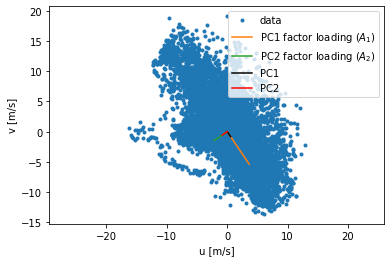

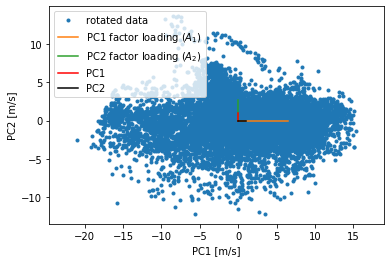

In [215]:
plt.figure()
plt.plot(u,v,'.')
plt.plot([0,A[0,0]],[0,A[1,0]])
plt.plot([0,A[0,1]],[0,A[1,1]])
plt.plot([0,PC1[0]],[0,PC1[1]],'k-')
plt.plot([0,PC2[0]],[0,PC2[1]],'r-')
plt.gca().axis('equal')
plt.xlabel('u [m/s]')
plt.ylabel('v [m/s]')
plt.legend(['data','PC1 factor loading ($A_1$)','PC2 factor loading ($A_2$)','PC1','PC2'])

plt.figure()
plt.plot(tau1,tau2,'.')
plt.plot([0,np.std(tau1)],[0,0])
plt.plot([0,0],[0,np.std(tau2)])
plt.plot([0,0],[0,1],'r-')
plt.plot([0,1],[0,0],'k-')
plt.legend(['rotated data','PC1 factor loading ($A_1$)','PC2 factor loading ($A_2$)','PC1','PC2'])
plt.xlabel('PC1 [m/s]')
plt.ylabel('PC2 [m/s]')
plt.gca().axis('equal')

#### Final exercise

d) Explain the relationship between the first principal component and upwelling.

*Insert text here* 